In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing()
target = pd.Series(df.target)

data = pd.DataFrame(df.data, columns=df.feature_names)
data['target'] = target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
features = ['HouseAge', 'Population']

In [4]:
data = data[features + ['target']]
data.head()

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [5]:
y = data['target']
X = data.drop(['target'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [9]:
data = data.head()

In [10]:
split_values = sorted(data.head()['HouseAge'].unique())
split_values

[21.0, 41.0, 52.0]

In [11]:
display(data[data['HouseAge'] <= 21], data[~(data['HouseAge'] <= 21)])

,HouseAge,Population,target
1,21.0,2401.0,3.585


,HouseAge,Population,target
0,41.0,322.0,4.526
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'HouseAge <= 51.5\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.5, 'HouseAge <= 21.5\nsquared_error = 1.259\nsamples = 19367\nvalue = 2.023'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Population <= 330.0\nsquared_error = 1.933\nsamples = 1273\nvalue = 2.754'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

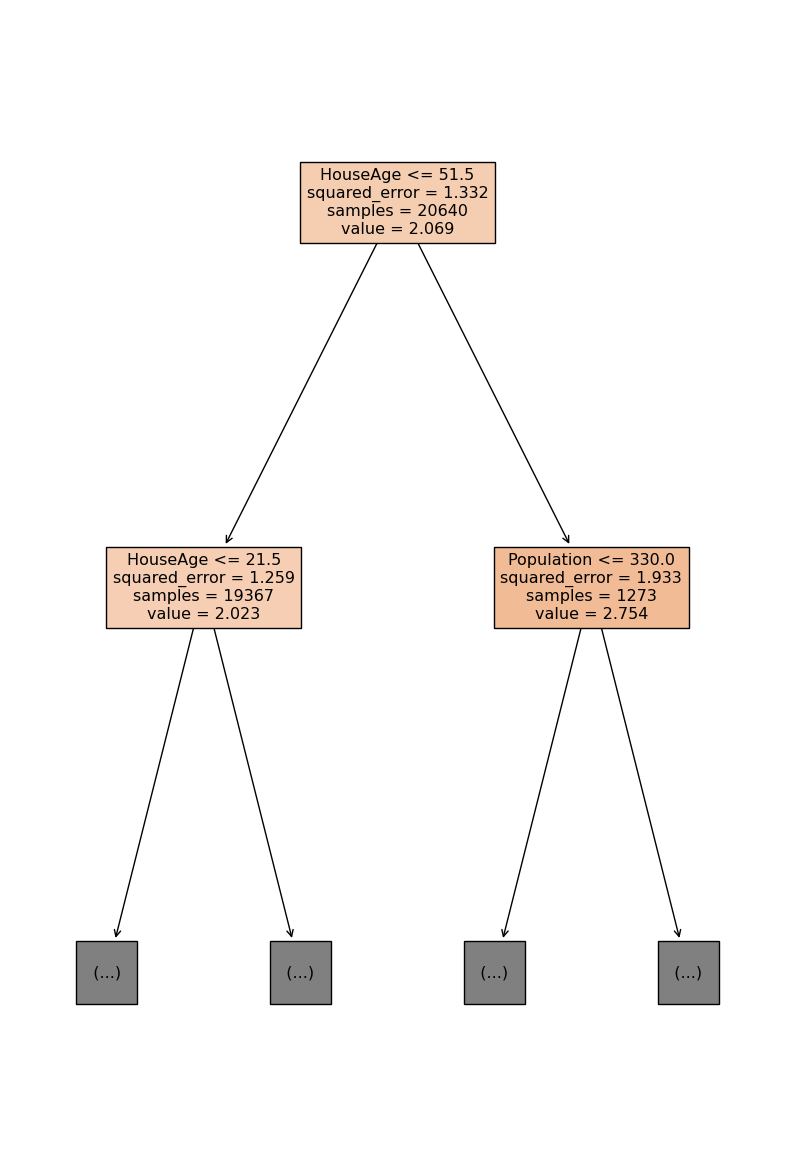

In [13]:
plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True, max_depth=1)